# EV3 Character Recognition Experiment - Analyse

1. Load the clean dataset
2. Do some basic EDA (shape, info, target count, head)
3. Plot graphs


## Analyse character reflectivity dataset

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

In [171]:
# Surpress matplotlib warnings[*] 
warnings.filterwarnings('ignore')

In [172]:
directory = !pwd
print(f'Working folder = {directory}')

Working folder = ['/Users/garry/Documents/GitHub/datapiquing/lego/character recognition/ev3/numbers/number_predict']


In [173]:
# Load dataset and extract feature set
filename='training_dataset.csv'
df_dataset = pd.read_csv(f'./clean_data/{filename}')
labels = df_dataset['target'].unique()
    
X = df_dataset.drop(labels='target', axis=1)

In [174]:
print(f'Rows = {X.shape[0]}, Columns = {X.shape[1]}')

Rows = 100, Columns = 37


In [175]:
print(f'Target labels in dataset = {labels}')

Target labels in dataset = [0 1 2 3 4 5 6 7 8 9]


In [176]:
# Get the total number of each target row
df_target_count = df_dataset.loc[:,['0', 'target']].groupby('target').count()
df_target_count.columns = ['total']
df_target_count

,total
target,
0,10
1,10
2,10
3,10
4,10
5,10
6,10
7,10
8,10


In [177]:
# Dataset
df_dataset.head()

,0,10,20,30,40,50,60,70,80,90,...,280,290,300,310,320,330,340,350,360,target
0,11,11,11,11,11,10,11,11,11,11,...,8,8,9,9,11,12,11,10,11,0
1,11,12,11,11,11,10,10,11,11,11,...,7,8,9,10,12,11,11,10,11,0
2,11,11,11,11,10,10,10,11,11,11,...,8,8,9,9,11,11,11,10,11,0
3,11,12,11,11,10,11,11,11,11,11,...,8,8,9,10,11,11,11,11,11,0
4,11,11,11,11,11,11,10,11,10,11,...,8,8,9,10,12,12,11,11,11,0


In [178]:
# Feature set
X.head()

,0,10,20,30,40,50,60,70,80,90,...,270,280,290,300,310,320,330,340,350,360
0,11,11,11,11,11,10,11,11,11,11,...,7,8,8,9,9,11,12,11,10,11
1,11,12,11,11,11,10,10,11,11,11,...,7,7,8,9,10,12,11,11,10,11
2,11,11,11,11,10,10,10,11,11,11,...,8,8,8,9,9,11,11,11,10,11
3,11,12,11,11,10,11,11,11,11,11,...,7,8,8,9,10,11,11,11,11,11
4,11,11,11,11,11,11,10,11,10,11,...,8,8,8,9,10,12,12,11,11,11


In [179]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       100 non-null    int64
 1   10      100 non-null    int64
 2   20      100 non-null    int64
 3   30      100 non-null    int64
 4   40      100 non-null    int64
 5   50      100 non-null    int64
 6   60      100 non-null    int64
 7   70      100 non-null    int64
 8   80      100 non-null    int64
 9   90      100 non-null    int64
 10  100     100 non-null    int64
 11  110     100 non-null    int64
 12  120     100 non-null    int64
 13  130     100 non-null    int64
 14  140     100 non-null    int64
 15  150     100 non-null    int64
 16  160     100 non-null    int64
 17  170     100 non-null    int64
 18  180     100 non-null    int64
 19  190     100 non-null    int64
 20  200     100 non-null    int64
 21  210     100 non-null    int64
 22  220     100 non-null    int64
 23  230     100 non-

In [180]:
def plot_dataset(filename, label=None):
    '''Load dataset and generate plots of all or individual target labels'''
    
    # Load dataset
    df_dataset = pd.read_csv(f'./clean_data/{filename}')
    labels = df_dataset['target'].unique()    
    
    if label is None:
        # Generate mean/median plots for all target labels in the dataset[*]
        rows = len(labels)
        plot_number = 0
        fig, axes = plt.subplots(nrows=rows, ncols=1, sharex=True, sharey=True, figsize = (15, 24))
        for l in labels:
            df = df_dataset[df_dataset['target'] == l]
            df = df.drop(labels='target', axis=1)
            df.transpose()
            df.mean().astype(int).plot(ax=axes[plot_number], label = f'mean #{l}')
            df.median().astype(int).plot(ax=axes[plot_number], label = f'median #{l}')
            axes[plot_number].legend(loc='upper right')
            if plot_number == 0:
                axes[plot_number].set_title(f'Angle vs Reflectivity (mean & median) for each target in the dataset')
            axes[plot_number].set_xlabel('Angle of rotation (degrees)')            
            #plt.xlabel('Angle of rotation (degrees)')
            if plot_number == 4:
                axes[plot_number].set_ylabel('Reflectivity (%)')
            #plt.ylabel('Reflectivity (%)')
            plt.subplots_adjust(wspace=0, hspace=0.4)
            plot_number += 1  
    elif label in labels:
        # Generate plots for a specific target label in the dataset
        fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize = (15, 6))
        df = df_dataset[df_dataset['target'] == int(label)]
        X = df.drop(labels='target', axis=1)
        
        # Plot all rows of the specified target
        X.transpose().plot(ax=axes[0], legend=False)
        axes[0].legend(title="Rotation#", fontsize='small', fancybox=False)
        axes[0].set_title(f'Angle vs Reflectivity for each rotation of #{label}')
        axes[0].set_xlabel('Angle of rotation (degrees)')
        axes[0].set_ylabel(f'Reflectivity of #{label} (%)')

        # Plot mean and median feature values for the specified target
        X.mean().astype(int).plot(label = 'mean')
        X.median().astype(int).plot(label = 'median')
        axes[1].legend()
        axes[1].set_title(f'Angle vs Reflectivity (mean & median) of #{label}')
        axes[1].set_xlabel('Angle of rotation (degrees)')
        axes[1].set_ylabel(f'Reflectivity of #{label} (%)')
    else:
        print(f'The chosen label, {label}, is not a label in this dataset')   
        
    plt.show()

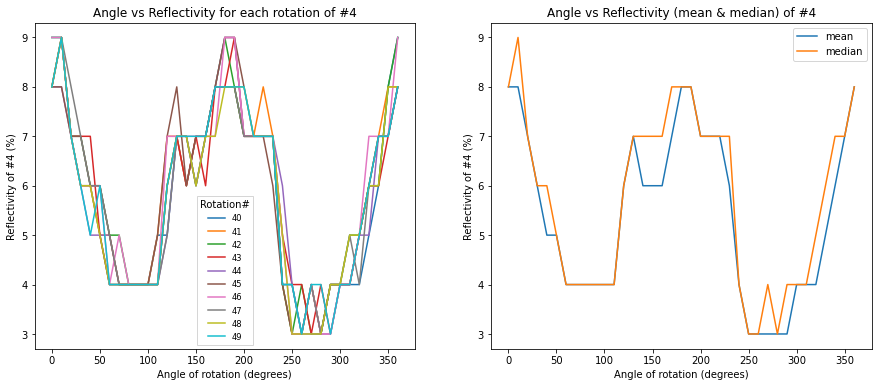

In [181]:
# Generate plots for a specific target label
plot_dataset(filename='training_dataset.csv', label=4)

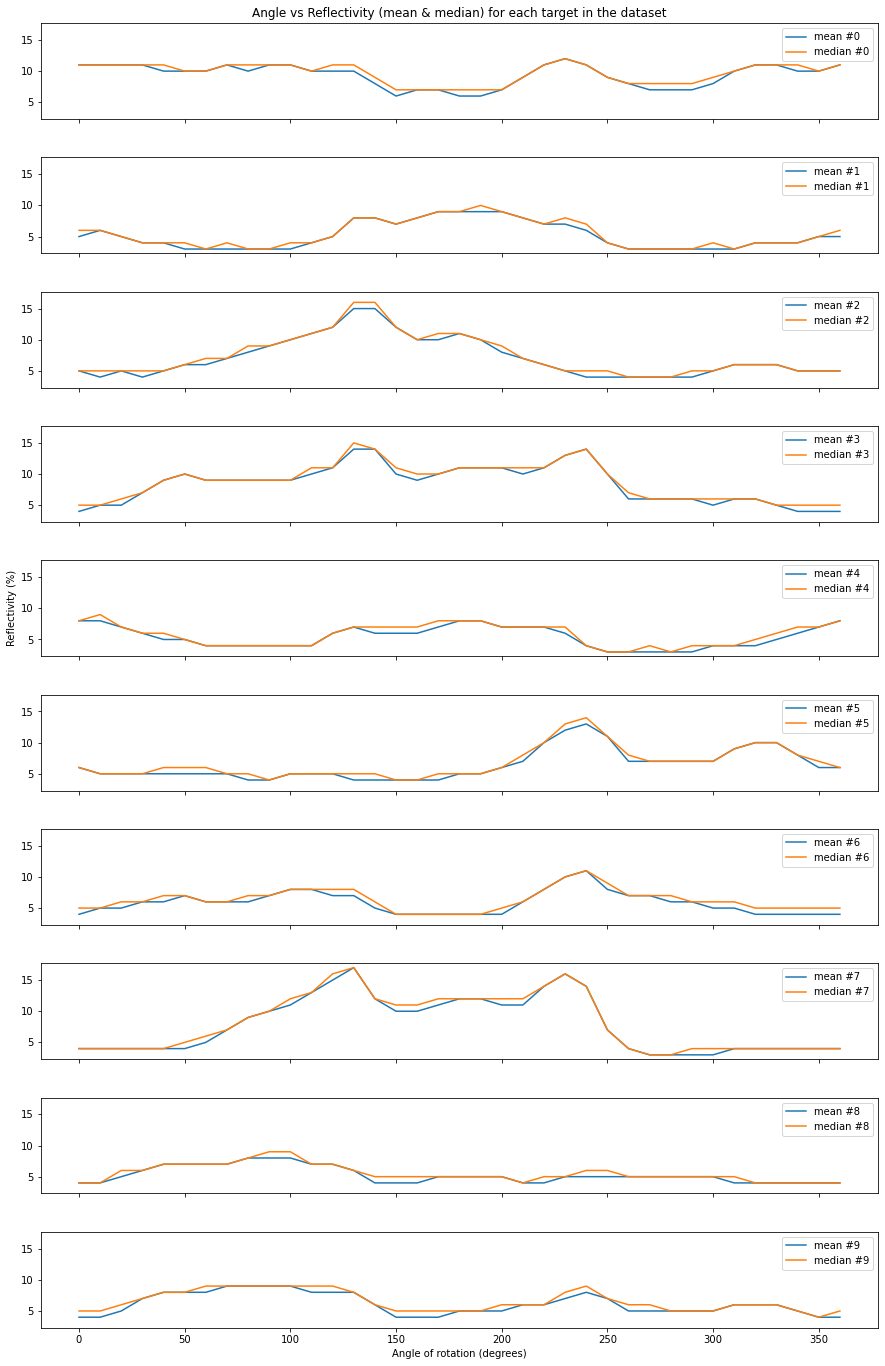

In [182]:
# Generate plots for all target labels
plot_dataset(filename='training_dataset.csv')